# Linear regression

Linear regression is used for creating predicting models by creating test data.

Pre-processing steps:

In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

The head( ) of the resulting data frame

In [2]:
df = pd.read_csv('data Mashable.csv')
df.head(10)

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,0,1,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.491362
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,0,1,0,1,0.417229,0.183895,0.166667,0.000000,27300,4.436163


Here I want to make a table of 5 variables and put shares_log as leading variable:

In [3]:
y = df['shares_log'] 
X = df[['num_imgs','average_token_length', 'is_weekend', 'shares', 'n_tokens_content']]
X.head()

,num_imgs,average_token_length,is_weekend,shares,n_tokens_content
0,12,4.518879,0,2100,821
1,6,5.040900,0,274,489
2,0,4.877863,0,1500,131
3,2,4.974820,0,2000,556
4,18,4.928409,0,6000,880


# Creating a train data in order to make a predict model:

In [ ]:
#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state" (we could use any number, it's a so-called "random seed"). 
#This means if we run the code again, it will produce the same results. Which can be handy.
#test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.dropna
X_train.head() #The train data

Plotting our test data:

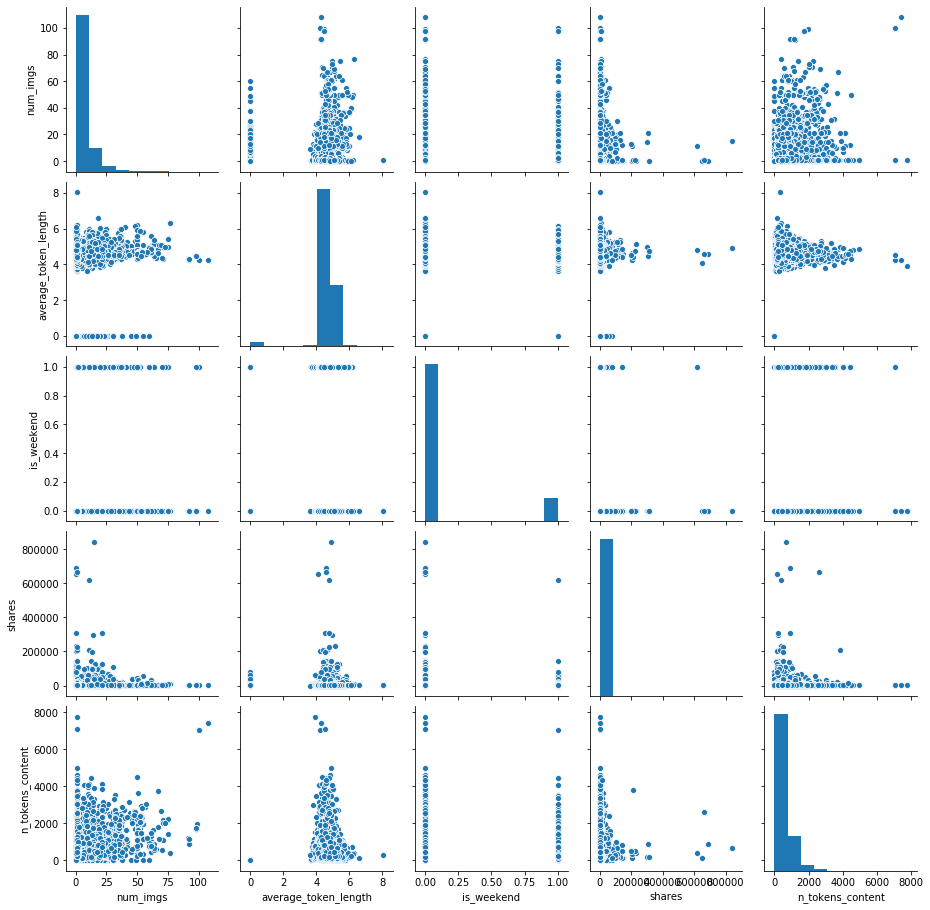

In [5]:
X_train.dropna
sns.pairplot(X_train)
plt.show() #using Matplotlib to show the plot

# Linear regression of the test data:

In [13]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.2710671011709146

As we see, R2 is not high, this means our test data is rather reliable, well predicted.

# Here we create the mean squared error for out test data:

In [25]:
model = lm.fit(X_train, y_train) #train the model
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
math.sqrt(mean_squared_error(y_test, y_test_p))

0.34665988599008546

# Here I want to create residual for shares_log_p:

In [27]:
df[shares_log]=shares_log.dropna
x = df[['shares_log']]
df['shares_log_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df.head(10)

NameError: name 'shares_log' is not defined

Frankly speaking, I dont understand this whole topic fully, rather 